In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

url = '/content/diabetes_prediction_dataset.csv'
data = pd.read_csv(url)

data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


*Removing the heart_disease and smoking_history columns because they consider the factors that are least likely to affect diabetes directly*

In [ ]:
#menghapus data
data = data.drop(['heart_disease', 'smoking_history',], axis=1)

*Gender: records the gender of the subject, which can be a binary value (for men, women).*

*Age: The age of the subject, possibly in years.*

*Hypertension: A binary indicator that indicates whether or not the subject has hypertension (0 for no, 1 for yes).*

*BMI (Body Mass Index): A measure that indicates the proportion of a person's weight relative to height. It is a common metric for assessing weight status.*

*HbA1c_level: Measures the average blood glucose level over the past few months. It is often used to assess blood sugar control in diabetics.*

*Blood_glucose_level: The subject's blood glucose level at a given time. It is an important indicator in diabetes monitoring.*

*Diabetes: A binary indicator that indicates whether the subject has diabetes or not (0 for no, 1 for yes).*

In [ ]:
data

,gender,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,25.19,6.6,140,0
1,Female,54.0,0,27.32,6.6,80,0
2,Male,28.0,0,27.32,5.7,158,0
3,Female,36.0,0,23.45,5.0,155,0
4,Male,76.0,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,Female,80.0,0,27.32,6.2,90,0
99996,Female,2.0,0,17.37,6.5,100,0
99997,Male,66.0,0,27.83,5.7,155,0
99998,Female,24.0,0,35.42,4.0,100,0


In [ ]:
#EKSPLANATORY DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 5.3+ MB


In [ ]:
data.describe()

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,95.690000,9.000000,300.000000,1.000000


In [ ]:
#PREPROCESSING
data.isnull().sum()

gender                 0
age                    0
hypertension           0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data[data.duplicated()]

,gender,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes,jarak
1521,0,80.0,0,27.32,6.5,200,0,85.152804
1961,1,49.0,0,27.32,6.1,160,1,34.672179
2157,1,62.0,0,27.32,5.8,90,0,58.270833
2365,1,24.0,0,27.32,4.0,130,0,5.766281
2640,0,52.0,0,27.32,5.0,159,0,36.169739
...,...,...,...,...,...,...,...,...
99983,1,21.0,0,27.32,5.7,126,0,9.931767
99985,0,25.0,0,27.32,5.8,145,0,10.074225
99989,1,26.0,0,27.32,5.0,158,0,23.092206
99990,0,39.0,0,27.32,6.1,100,0,37.711537


In [ ]:
data = data.drop_duplicates()

In [ ]:
data

,gender,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes,jarak
0,1,80.0,0,25.19,6.6,140,0,55.277002
1,1,54.0,0,27.32,6.6,80,0,62.185288
2,0,28.0,0,27.32,5.7,158,0,23.230153
3,1,36.0,0,23.45,5.0,155,0,23.221260
4,0,76.0,1,20.14,4.8,155,0,55.276056
...,...,...,...,...,...,...,...,...
99994,1,36.0,0,24.60,4.8,145,0,15.241010
99996,1,2.0,0,17.37,6.5,100,0,43.058129
99997,0,66.0,0,27.83,5.7,155,0,45.638800
99998,1,24.0,0,35.42,4.0,100,0,36.039700


In [ ]:
from sklearn.preprocessing import LabelBinarizer
# Mengubah kolom gender dari string menjadi binary
label_binarizer = LabelBinarizer()

# Melakukan transformasi pada kolom Jenis Kelamin
data['gender'] = label_binarizer.fit_transform(data['gender'])

# Menampilkan hasil
print(data)


       gender   age  hypertension    bmi  HbA1c_level  blood_glucose_level  \
0           1  80.0             0  25.19          6.6                  140   
1           1  54.0             0  27.32          6.6                   80   
2           0  28.0             0  27.32          5.7                  158   
3           1  36.0             0  23.45          5.0                  155   
4           0  76.0             1  20.14          4.8                  155   
...       ...   ...           ...    ...          ...                  ...   
99995       1  80.0             0  27.32          6.2                   90   
99996       1   2.0             0  17.37          6.5                  100   
99997       0  66.0             0  27.83          5.7                  155   
99998       1  24.0             0  35.42          4.0                  100   
99999       1  57.0             0  22.43          6.6                   90   

       diabetes  
0             0  
1             0  
2        

In [ ]:
data

,gender,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,25.19,6.6,140,0
1,1,54.0,0,27.32,6.6,80,0
2,0,28.0,0,27.32,5.7,158,0
3,1,36.0,0,23.45,5.0,155,0
4,0,76.0,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,1,80.0,0,27.32,6.2,90,0
99996,1,2.0,0,17.37,6.5,100,0
99997,0,66.0,0,27.83,5.7,155,0
99998,1,24.0,0,35.42,4.0,100,0


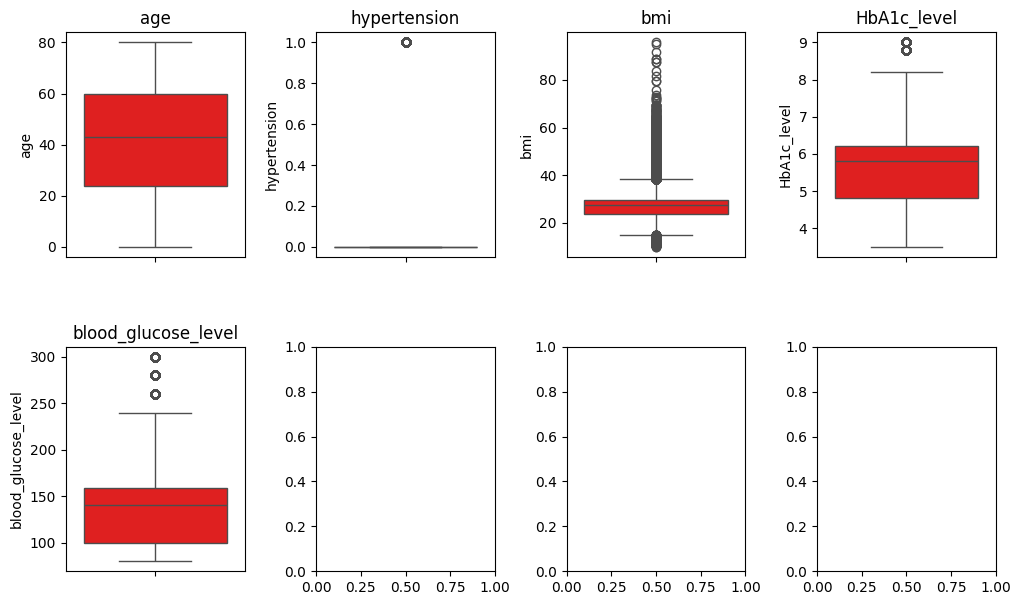

In [ ]:
def box_plot(data):
    # Variabel yang akan divisualisasikan
    variables = [ 'age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level',]

    # Membuat figure dan axes untuk subplot dengan ukuran 4x2
    fig, axes = plt.subplots(2, 4, figsize=(12, 7))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Atur jarak antar subplot

    # Iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        row, col = i // 4, i % 4  # Tentukan posisi subplot
        sns.boxplot(y=data[var], color="red", ax=axes[row, col])
        axes[row, col].set_title(var)  # Tambahkan judul untuk setiap plot

    # Tampilkan plot
    plt.show()

# Memanggil fungsi box_plot dengan data contoh
box_plot(data)


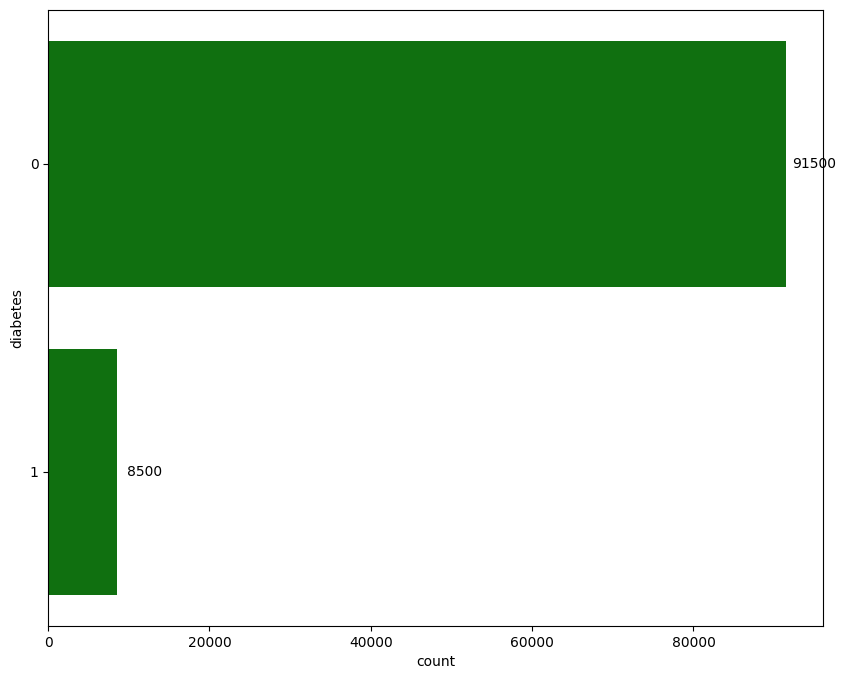

In [ ]:
# Atur ukuran canvas
plt.figure(figsize=(10,8))

# Buat countplot dengan orientasi horizontal
plot = sns.countplot(y='diabetes', data=data, color='green')

# Menambahkan label pada masing-masing bar
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width(), p.get_y() + p.get_height() /2),
                  ha = 'center', va = 'center',
                  xytext = (20,0),
                  textcoords = 'offset points')
# Menampilkan plot
plt.show()

In [ ]:
#plt.figure(figsize=(8,5))
#sns.heatmap(data.corr(), annot=True)

In [ ]:
#0 = male
#1 = female


# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

#Menggunakan LabelEncoder untuk mengkodekan kolom 'gender'
data['gender'] = label_encoder.fit_transform(data['gender'])
data.head()

,gender,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,25.19,6.6,140,0
1,1,54.0,0,27.32,6.6,80,0
2,0,28.0,0,27.32,5.7,158,0
3,1,36.0,0,23.45,5.0,155,0
4,0,76.0,1,20.14,4.8,155,0


In [ ]:
#Variabel x
X = data[['age',	'hypertension', 'bmi',	'HbA1c_level',	'blood_glucose_level',]]

#Variabel y
y = data['diabetes']

#membagi antara dua variabel yaitu x dan y

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
hasil_sc = sc.fit_transform(X)
hasil_sc

array([[ 1.69270354e+00, -2.84439447e-01, -3.21055792e-01,
         1.00170572e+00,  4.77042159e-02],
       [ 5.38006427e-01, -2.84439447e-01, -1.15583678e-04,
         1.00170572e+00, -1.42620999e+00],
       [-6.16690686e-01, -2.84439447e-01, -1.15583678e-04,
         1.61108022e-01,  4.89878478e-01],
       ...,
       [ 1.07094356e+00, -2.84439447e-01,  7.67292549e-02,
         1.61108022e-01,  4.16182767e-01],
       [-7.94336396e-01, -2.84439447e-01,  1.22036126e+00,
        -1.42668764e+00, -9.34905254e-01],
       [ 6.71240710e-01, -2.84439447e-01, -7.36921977e-01,
         1.00170572e+00, -1.18055762e+00]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**KNN**

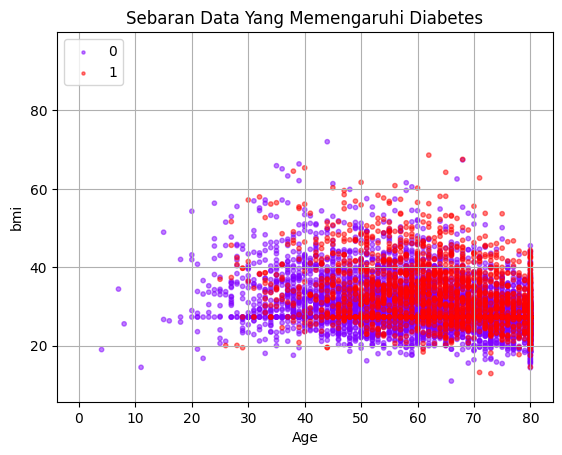

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Membuat daftar warna acak untuk setiap kategori
kategori_unik = data['diabetes'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(kategori_unik)))

# Menggambar scatter plot
for diabetes, d in data.groupby('diabetes'):
    warna = colors[np.where(kategori_unik == diabetes)[0][0]]  # Pilih warna acak sesuai dengan kategori
    ax.scatter(d['age'],            # x-axis
               d['bmi'],   # y-axis
               s=d['hypertension']*10,       # ukuran marker (dapat disesuaikan)
               c=[warna],           # warna marker
               marker='o',
               alpha=0.5,
               label=str(diabetes))

plt.legend(loc='upper left')
plt.title('Sebaran Data Yang Memengaruhi Diabetes')
plt.xlabel('Age')
plt.ylabel('bmi')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

X_train = np.array (data [['age', 'hypertension',  'bmi',	'HbA1c_level',	'blood_glucose_level']])
y_train = np.array(data['diabetes'])

print(f'X_train:\n{X_train}\n')
print(f'y_train:{y_train}')

X_train:
[[ 80.     0.    25.19   6.6  140.  ]
 [ 54.     0.    27.32   6.6   80.  ]
 [ 28.     0.    27.32   5.7  158.  ]
 ...
 [ 66.     0.    27.83   5.7  155.  ]
 [ 24.     0.    35.42   4.   100.  ]
 [ 57.     0.    22.43   6.6   90.  ]]

y_train:[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(f'y_train setelah transformasi:\n{y_train}')

y_train setelah transformasi:
[0 0 0 ... 0 0 0]


In [ ]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

#flatten agar arraynya ke samping

y_train: [0 0 0 ... 0 0 0]


In [ ]:
data

,gender,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,25.19,6.6,140,0
1,1,54.0,0,27.32,6.6,80,0
2,0,28.0,0,27.32,5.7,158,0
3,1,36.0,0,23.45,5.0,155,0
4,0,76.0,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,1,80.0,0,27.32,6.2,90,0
99996,1,2.0,0,17.37,6.5,100,0
99997,0,66.0,0,27.83,5.7,155,0
99998,1,24.0,0,35.42,4.0,100,0


In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Definisikan data baru
age = 25.0
gender = 1
bmi = 27.32
HbA1c_level = 6.5
blood_glucose_level = 135


# Buat array baru untuk data baru
X_new = np.array([age, gender, bmi, HbA1c_level, blood_glucose_level]).reshape(1, -1)

print(X_new)


[[ 25.     1.    27.32   6.5  135.  ]]


In [ ]:
y_new = model.predict(X_new)
print("Hasil prediksi:", y_new)
#memprediksi

Hasil prediksi: [0]


In [ ]:
le.inverse_transform(y_new)

array([0])

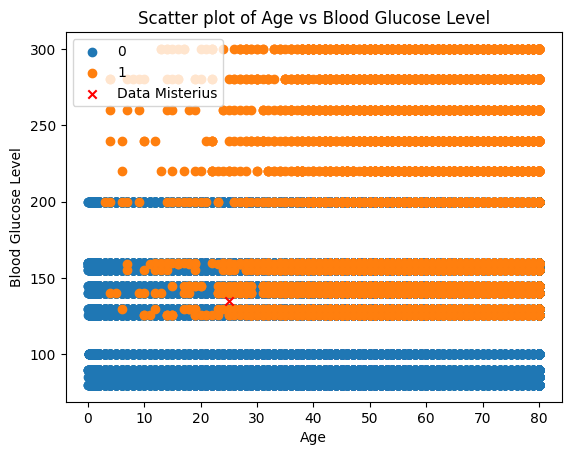

In [ ]:
fig, ax = plt.subplots()

# Membuat scatter plot dari data berdasarkan kategori 'diabetes'
for Category, d in data.groupby('diabetes'):
    ax.scatter(d['age'], d['blood_glucose_level'], label=Category)

# Menambahkan data tambahan 'Data Misterius'
plt.scatter(age, blood_glucose_level, color='red', marker='x', label='Data Misterius')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.title('Scatter plot of Age vs Blood Glucose Level')
plt.show()


<Axes: >

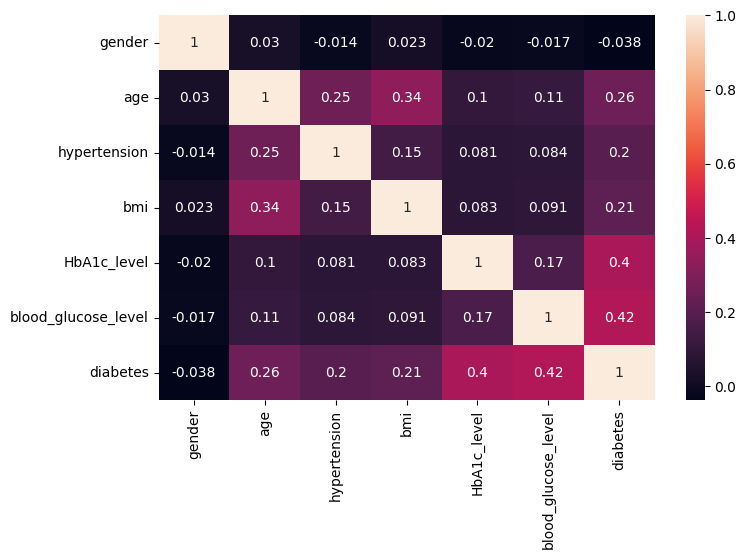

In [ ]:
#tidak bisa dari data string

plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True)

In [ ]:
misterius = np.array([age, blood_glucose_level])
misterius

array([ 25., 135.])

In [ ]:
X_train

array([[ 80.  ,   0.  ,  25.19,   6.6 , 140.  ],
       [ 54.  ,   0.  ,  27.32,   6.6 ,  80.  ],
       [ 28.  ,   0.  ,  27.32,   5.7 , 158.  ],
       ...,
       [ 66.  ,   0.  ,  27.83,   5.7 , 155.  ],
       [ 24.  ,   0.  ,  35.42,   4.  , 100.  ],
       [ 57.  ,   0.  ,  22.43,   6.6 ,  90.  ]])

In [ ]:
import numpy as np

# Misal misterius adalah vektor [a, b]
misterius = np.array([age, gender,	bmi,	HbA1c_level,	blood_glucose_level])


In [ ]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean (misterius, d) for d in X_train]
data_jarak

[55.27700154675541,
 62.185287649089474,
 23.230152819127127,
 23.221259655755112,
 55.2760562992694,
 50.25942697643896,
 68.19941422035822,
 73.68589824382953,
 20.804624485916587,
 35.738634557016866,
 57.316315303759716,
 53.07461163305861,
 53.97650322130918,
 77.41541771507792,
 56.82649030161902,
 53.76811322707911,
 65.84376659942838,
 28.769873131454716,
 57.581594281506305,
 27.06584563615185,
 48.304591914226954,
 54.531462478096074,
 66.9093147476493,
 47.279851945622674,
 25.513504267348303,
 12.191538048991193,
 77.3950902835574,
 57.02430096020468,
 30.593667645445848,
 26.957329244567237,
 70.96389856821565,
 27.146986941463688,
 19.138602352314027,
 35.86526035037247,
 71.54343366095871,
 55.23421403441892,
 12.685172446600795,
 65.30099539823264,
 127.4779981016332,
 71.79472195085096,
 54.20551724686335,
 20.640009689920205,
 57.48338890496976,
 47.59002416473436,
 48.979587585033826,
 39.91080179600505,
 45.81011787804087,
 43.52647585091171,
 23.895449357565973,
 4

In [ ]:
data['jarak'] = data_jarak
data.sort_values(['jarak'])

,gender,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes,jarak
38680,0,25.0,1,27.50,6.6,140,0,5.004238
9333,1,25.0,1,27.32,6.2,130,0,5.008992
22233,1,25.0,0,27.32,6.5,140,0,5.099020
88193,1,25.0,0,27.32,6.5,130,0,5.099020
54482,0,25.0,0,27.32,6.5,140,0,5.099020
...,...,...,...,...,...,...,...,...
63254,0,80.0,0,37.06,6.2,300,1,174.200912
65445,0,80.0,0,37.18,5.8,300,1,174.208810
50782,1,80.0,0,39.23,6.8,300,1,174.335705
68279,0,80.0,1,42.28,8.8,300,1,174.582621


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# TESTING SET
X_test = np.array([[20.0, 0, 26.7, 6.3, 150],
                   [34.0, 1, 24.30, 7.3, 200],
                   [23.0, 1, 27.00, 6.1, 170],
                   [24.0, 1, 25.00, 6.8, 300],
                   [43.0, 0, 39.23, 7.5, 300]])

# Membuat LabelEncoder
le = LabelEncoder()

# Latih (fit) LabelEncoder dengan label yang Anda miliki
le.fit(['age', 'hypertension',  'bmi', 'HbA1c_level', 'blood_glucose_level'])

# Transformasikan label menjadi nilai numerik
y_test = le.transform(['HbA1c_level', 'bmi',  'age', 'HbA1c_level', 'blood_glucose_level']).flatten()

print(f'X_test: \n{X_test}\n')
print(f'y_test: \n{y_test}')


X_test: 
[[ 20.     0.    26.7    6.3  150.  ]
 [ 34.     1.    24.3    7.3  200.  ]
 [ 23.     1.    27.     6.1  170.  ]
 [ 24.     1.    25.     6.8  300.  ]
 [ 43.     0.    39.23   7.5  300.  ]]

y_test: 
[0 3 1 0 2]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Definisikan model KNeighborsClassifier
model = KNeighborsClassifier()

# Latih model menggunakan data latih (X_train, y_train)
model.fit(X_train, y_train)

# Lakukan prediksi terhadap data uji (X_test)
y_pred = model.predict(X_test)

# Tampilkan hasil prediksi
print(y_pred)


[0 0 0 1 1]


In [ ]:
#EVALUASI DENGAN AKURASI
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy:{acc}')

Accuracy:0.2


In [ ]:
#EVALUASI DENGAN PRESISI
#menggunakan micro karena target lebih dari 2
from sklearn.metrics import precision_score

prec_micro = precision_score(y_test, y_pred, average='micro')

print(f'Precission (micro): {prec_micro}')


Precission (micro): 0.2


In [ ]:
#EVALUASI DENGAN RECALL
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred, average='macro')

print(f'Recall: {rec}')

Recall: 0.125


In [ ]:
#EVALUASI DENGAN F1
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='macro')

print(f'F1-score: {f1}')

F1-score: 0.1


In [ ]:
#EVALUASI DENGAN CLASSIFICATION REPORT
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.08      0.12      0.10         5
weighted avg       0.13      0.20      0.16         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
